In [1]:
cd '~/cloudFinder/'

/home/antoine/cloudFinder


In [2]:
import pandas as pd
import feather as ft
import numpy as np

from src.image.utils import load_image
import plotly.offline as po
import plotly.graph_objects as go

po.init_notebook_mode()

======================================================================================================

In [3]:
MODEL_PATH = 'models/sky_segmentation/model_1/'
IMG_PATH = 'data/img/sky_segmentation/'

VAR_TO_ANALYZE = 'is_sky_PREDICTED'

======================================================================================================

In [4]:
df_score = ft.read_dataframe(MODEL_PATH + '/score_per_image.ft')
df_score.head()

img_name      prediction_label     metric     score
0  labelme_aacpgupgzvdjapw.jpg      is_sky_PREDICTED   accuracy  0.866917
1  labelme_aacpgupgzvdjapw.jpg      is_sky_PREDICTED  precision  0.741146
2  labelme_aacpgupgzvdjapw.jpg      is_sky_PREDICTED     recall  0.589976
3  labelme_aacpgupgzvdjapw.jpg  is_sky_PREDICTED_COR   accuracy  0.881729
4  labelme_aacpgupgzvdjapw.jpg  is_sky_PREDICTED_COR  precision  0.874424

In [5]:
df_train_dataset_meta = ft.read_dataframe(MODEL_PATH+ '/traindataset_meta.ft')
df_train_dataset_meta.head()

size_h  size_l  sky_coverage  is_used                     img_name
0     100     133      0.216015     True  labelme_aacpgupgzvdjapw.jpg
1     100     133      0.103534     True  labelme_aajuldidvlcyzhv.jpg
2       0       0      0.002105    False  labelme_aajvoauwthyaehf.jpg
3     100     133      0.337744     True  labelme_aalbzqrimafwbiv.jpg
4       0       0      0.022632    False  labelme_aatpnkdmtvmagyh.jpg

In [6]:
df_score = pd.merge(df_score, df_train_dataset_meta, left_on='img_name', right_on='img_name', how='left')
df_score.head()

img_name      prediction_label     metric     score  \
0  labelme_aacpgupgzvdjapw.jpg      is_sky_PREDICTED   accuracy  0.866917   
1  labelme_aacpgupgzvdjapw.jpg      is_sky_PREDICTED  precision  0.741146   
2  labelme_aacpgupgzvdjapw.jpg      is_sky_PREDICTED     recall  0.589976   
3  labelme_aacpgupgzvdjapw.jpg  is_sky_PREDICTED_COR   accuracy  0.881729   
4  labelme_aacpgupgzvdjapw.jpg  is_sky_PREDICTED_COR  precision  0.874424   

   size_h  size_l  sky_coverage  is_used  
0     100     133      0.216015     True  
1     100     133      0.216015     True  
2     100     133      0.216015     True  
3     100     133      0.216015     True  
4     100     133      0.216015     True

## What are the picture with no sky detected?

In [7]:
df_no_sky_detected = df_score[(df_score.score < 0.2) & (df_score.metric=='recall') & (df_score.prediction_label==VAR_TO_ANALYZE)].copy()

In [8]:
print('{} image with no sky detected'.format(len(df_no_sky_detected)))

354 image with no sky detected


In [9]:
df_recall = df_score[(df_score.metric=='recall') & (df_score.prediction_label==VAR_TO_ANALYZE)].copy()

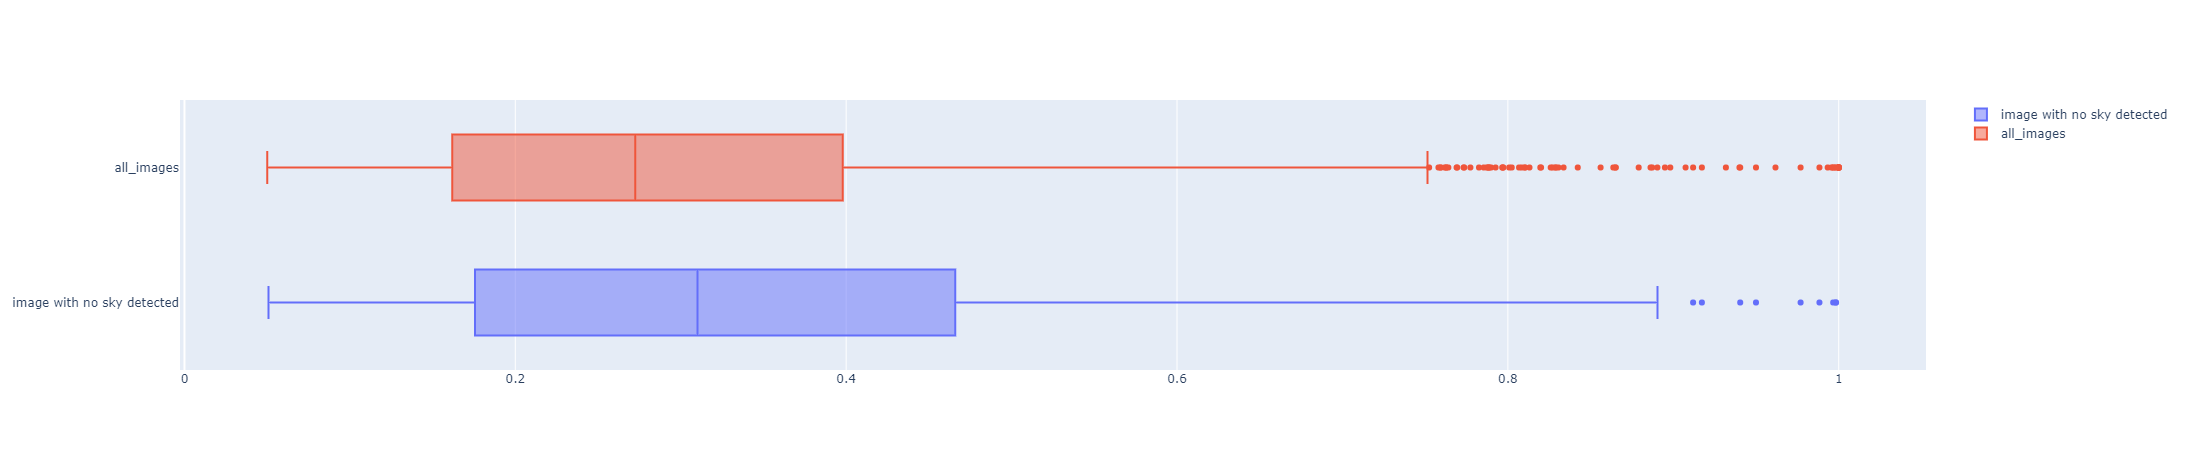

In [10]:
data = []

data.append(go.Box(x=df_no_sky_detected.sky_coverage, name="image with no sky detected"))
data.append(go.Box(x=df_recall.sky_coverage, name="all_images"))

po.iplot(go.Figure(data))

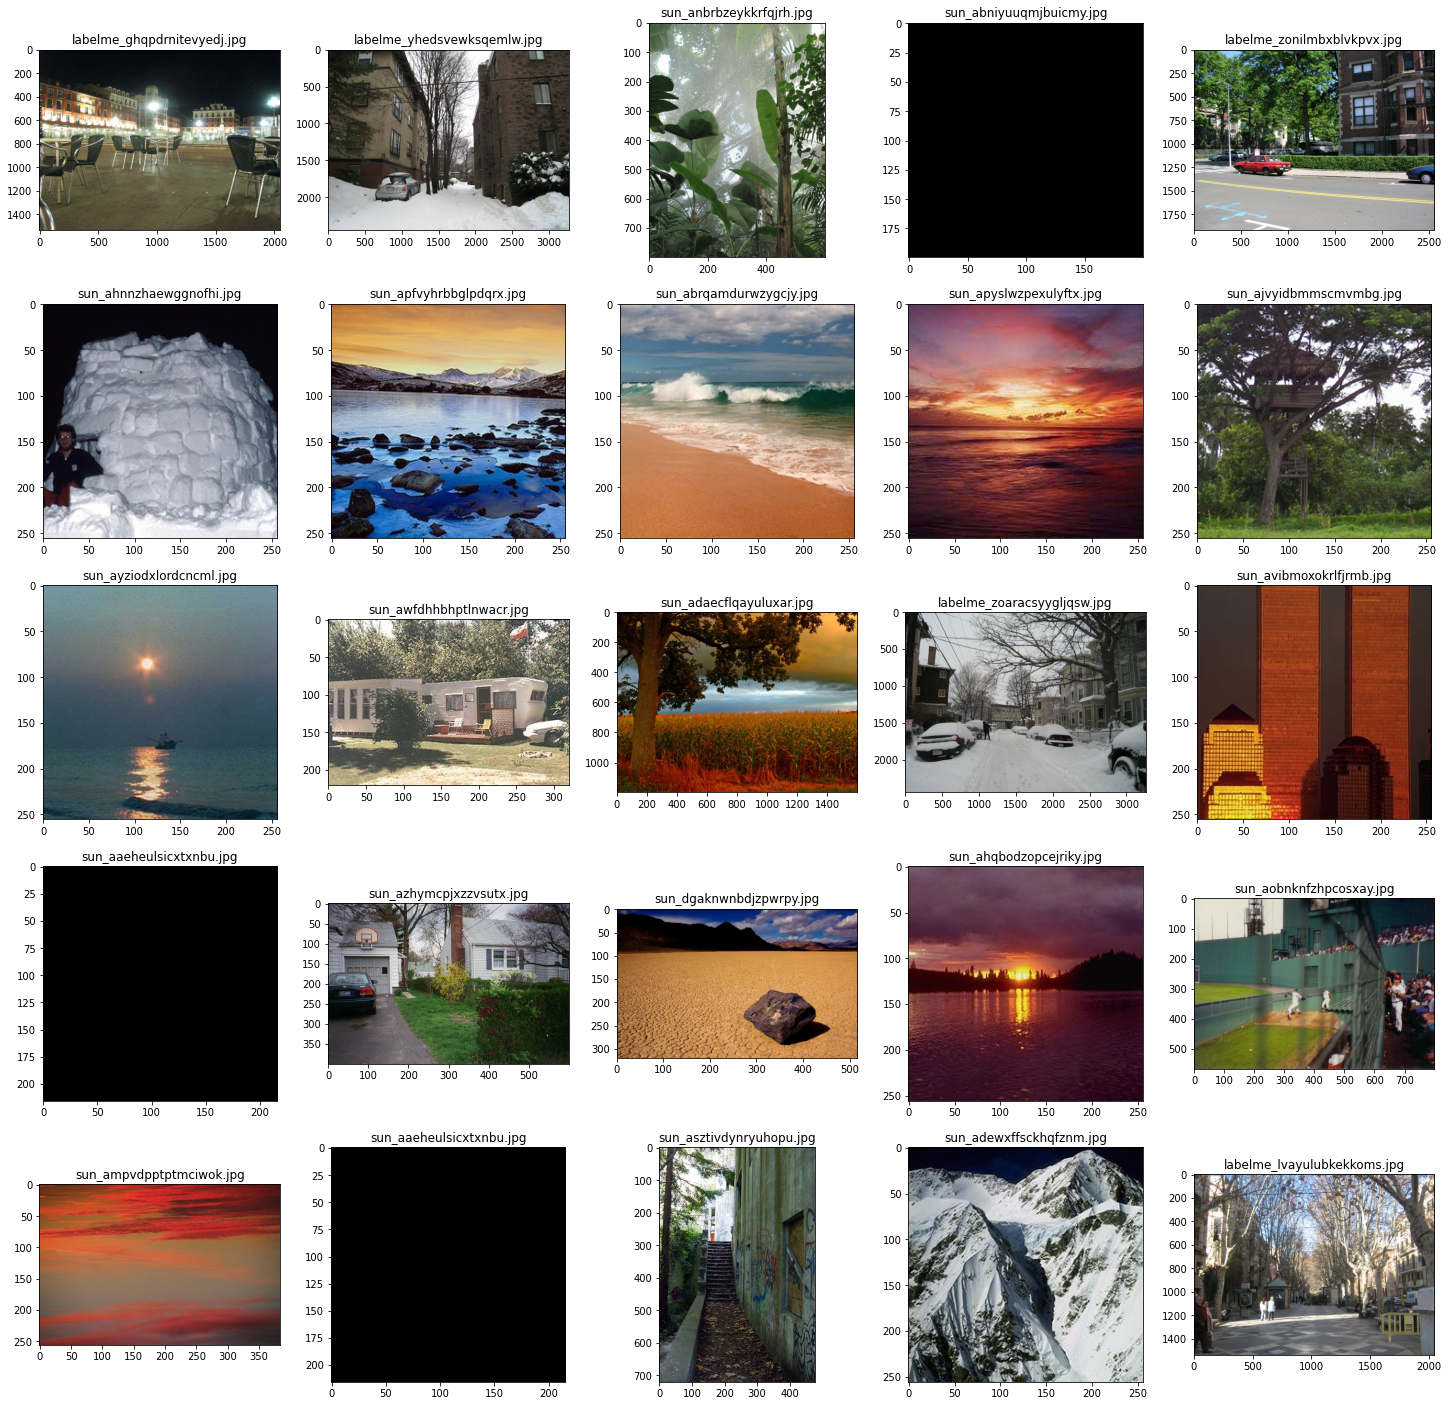

In [11]:
import matplotlib.pyplot as plt

img_with_no_sky_detected = list(set(df_no_sky_detected.img_name))

ROW = 5
COL = 5

fig, ax = plt.subplots(ncols=COL, nrows=ROW, figsize=(5*COL, 5*ROW))

for r in range(ROW):
    for c in range(COL):
        img_name = img_with_no_sky_detected[np.random.randint(len(img_with_no_sky_detected))]
        image = load_image(IMG_PATH, img_name)
        
        ax[r, c].imshow(image)
        ax[r, c].set_title(img_name)

## What are the picture with many sky detection that is not ?

In [12]:
df_sky_wrongly_detected = df_score[(df_score.score<0.8) & (df_score.metric=='precision') & (df_score.prediction_label==VAR_TO_ANALYZE)].copy()

In [13]:
print('{} image with sky detected that is not'.format(len(df_sky_wrongly_detected)))

1661 image with sky detected that is not


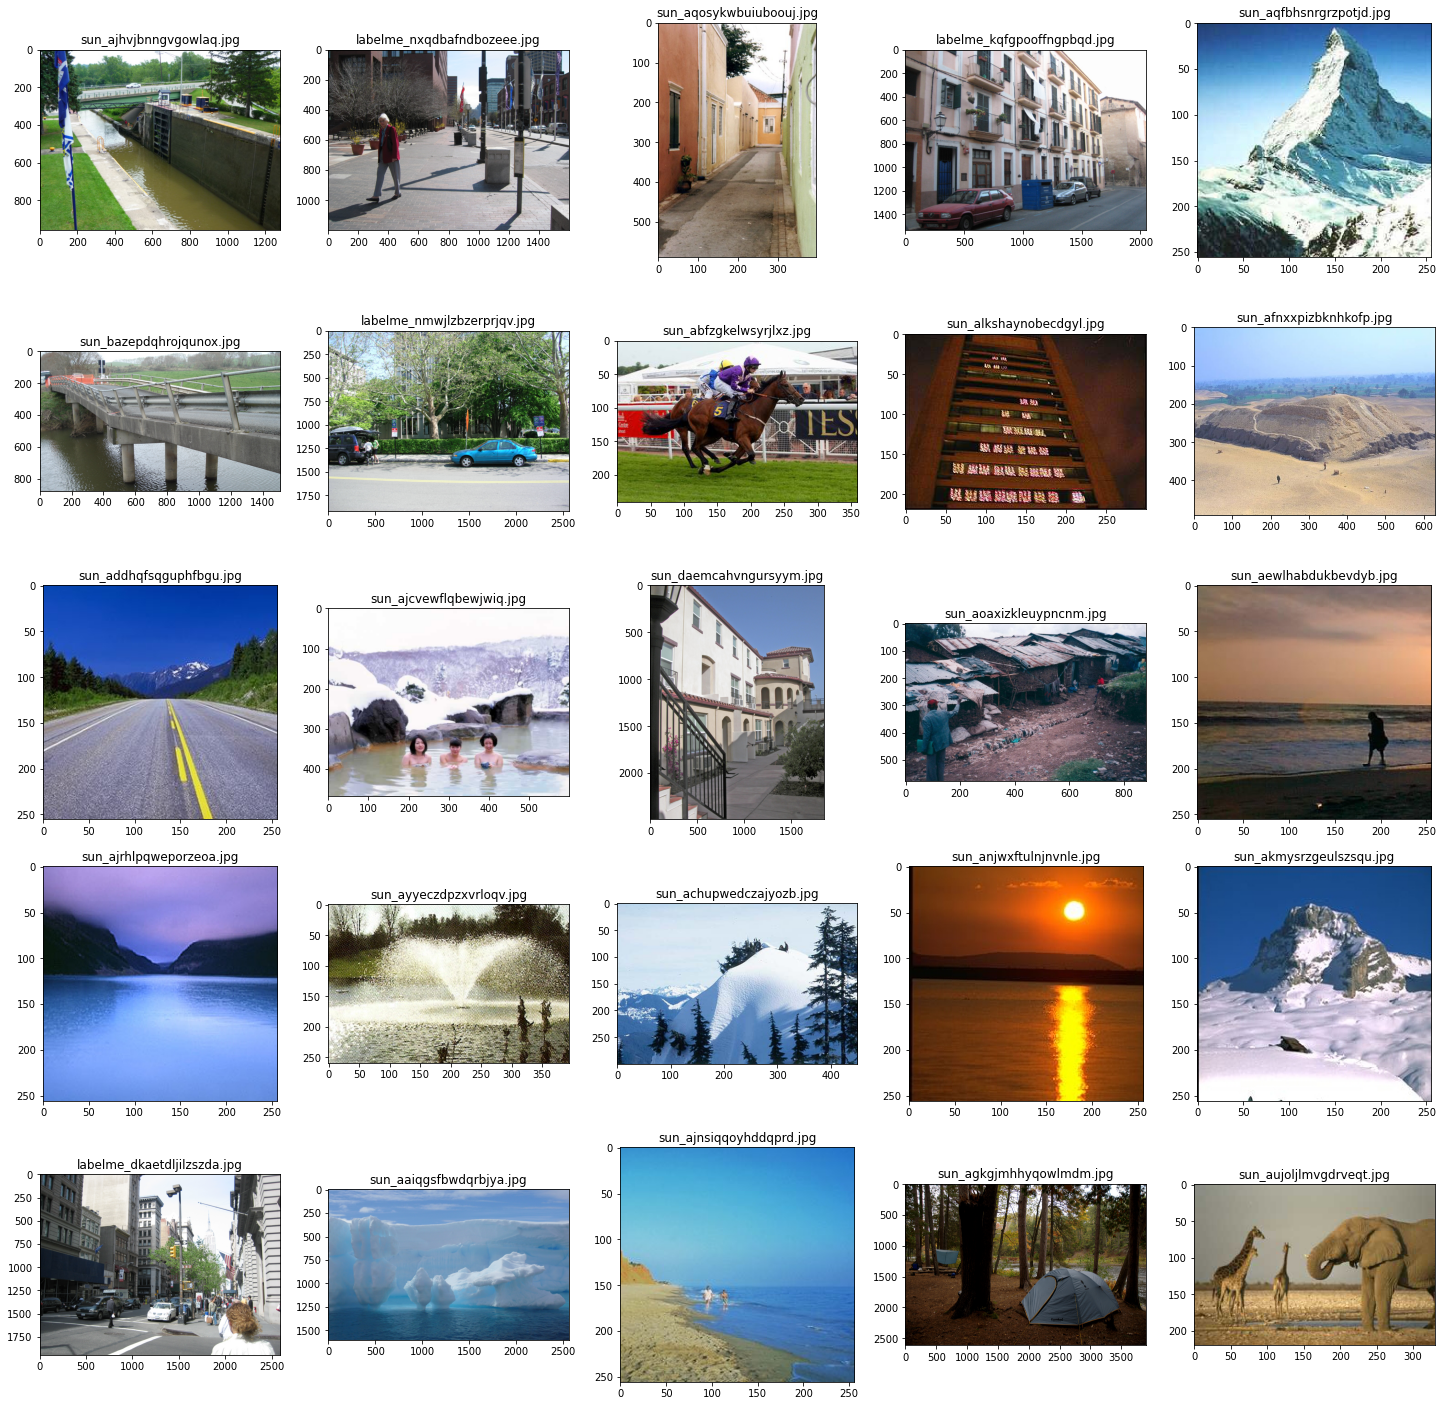

In [14]:
import matplotlib.pyplot as plt

img_with_sky_wrongly_detected = list(set(df_sky_wrongly_detected.img_name))

ROW = 5
COL = 5

fig, ax = plt.subplots(ncols=COL, nrows=ROW, figsize=(5*COL, 5*ROW))

for r in range(ROW):
    for c in range(COL):
        img_name = img_with_sky_wrongly_detected[np.random.randint(len(img_with_sky_wrongly_detected))]
        image = load_image(IMG_PATH, img_name)
        
        ax[r, c].imshow(image)
        ax[r, c].set_title(img_name)